In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('abandonos 2.xlsx')
df.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.info() #En este data frame, las variables binarios tienen 1: positivo y 0: negativo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           10000 non-null  object 
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [4]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [5]:
X = df.drop(columns = ['Exited','CustomerId'])
y = df['Exited']

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)

In [8]:
y_train.value_counts()

0    5574
1    1426
Name: Exited, dtype: int64

In [9]:
y_test.value_counts()

0    2389
1     611
Name: Exited, dtype: int64

In [10]:
import os

In [11]:
os.chdir('..')

In [12]:
os.getcwd()

'C:\\Users\\jeanp\\Notebooks\\06. Aprendizaje Supervisado'

In [13]:
from src.preprocessing import preprocessing

In [14]:
X_train_df, X_test_df = preprocessing(X_train, X_test, scale_nums = False, nombre = 'DTree')

C:\Users\jeanp\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [15]:
X_train_df.head()

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9136,1.0,0.0,0.0,0.0,1.0,595.0,20.0,4.0,95830.43,1.0,1.0,0.0,177738.98
6410,0.0,0.0,1.0,1.0,0.0,689.0,63.0,1.0,0.00,2.0,1.0,1.0,186526.12
2607,1.0,0.0,0.0,0.0,1.0,814.0,31.0,1.0,118870.92,1.0,1.0,0.0,101704.19
3201,1.0,0.0,0.0,0.0,1.0,722.0,20.0,6.0,0.00,2.0,1.0,0.0,195486.28
3330,1.0,0.0,0.0,0.0,1.0,738.0,18.0,4.0,0.00,2.0,1.0,1.0,47799.15


In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
dtree_full = DecisionTreeClassifier()
dtree_prun = DecisionTreeClassifier(max_depth = 4)

In [18]:
dtree_full.fit(X_train_df, y_train)

DecisionTreeClassifier()

In [19]:
dtree_prun.fit(X_train_df, y_train)

DecisionTreeClassifier(max_depth=4)

In [20]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [21]:
pred_full = dtree_full.predict(X_test_df)
pred_prun = dtree_prun.predict(X_test_df)

In [22]:
pred_full_train = dtree_full.predict(X_train_df)
pred_prun_train = dtree_prun.predict(X_train_df)

In [23]:
print(classification_report(y_train, pred_full_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5574
           1       1.00      1.00      1.00      1426

    accuracy                           1.00      7000
   macro avg       1.00      1.00      1.00      7000
weighted avg       1.00      1.00      1.00      7000



In [24]:
print(classification_report(y_train, pred_prun_train))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      5574
           1       0.75      0.40      0.52      1426

    accuracy                           0.85      7000
   macro avg       0.80      0.68      0.71      7000
weighted avg       0.84      0.85      0.83      7000



In [25]:
print(classification_report(y_test, pred_full))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      2389
           1       0.49      0.52      0.51       611

    accuracy                           0.79      3000
   macro avg       0.68      0.69      0.69      3000
weighted avg       0.80      0.79      0.79      3000



In [26]:
print(classification_report(y_test, pred_prun))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      2389
           1       0.74      0.44      0.55       611

    accuracy                           0.85      3000
   macro avg       0.81      0.70      0.73      3000
weighted avg       0.84      0.85      0.84      3000



In [27]:
from sklearn.metrics import accuracy_score

In [28]:
profundidades = [2,3,4,5,10,12,15,20,25,30]

accuracy = []
for profundidad in profundidades:
    model = DecisionTreeClassifier(max_depth = profundidad)
    model.fit(X_train_df,y_train)
    pred_train = model.predict(X_train_df)
    pred_test = model.predict(X_test_df)
    acc_train = accuracy_score(y_train,pred_train)
    acc_test = accuracy_score(y_test,pred_test)
    accuracy.append([acc_train, acc_test])

df_accuracy = pd.DataFrame(accuracy, columns = ['train','test'])
df_accuracy['profundidad'] = profundidades

<Axes: xlabel='profundidad'>

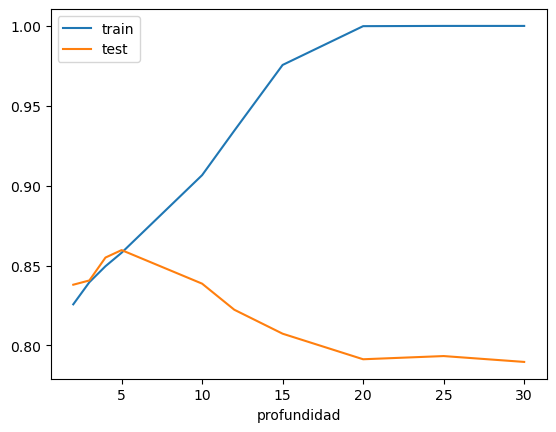

In [29]:
df_accuracy.plot(x='profundidad')

In [30]:
#Visualicemos nuestro árbol de decisión:
from sklearn.tree import plot_tree

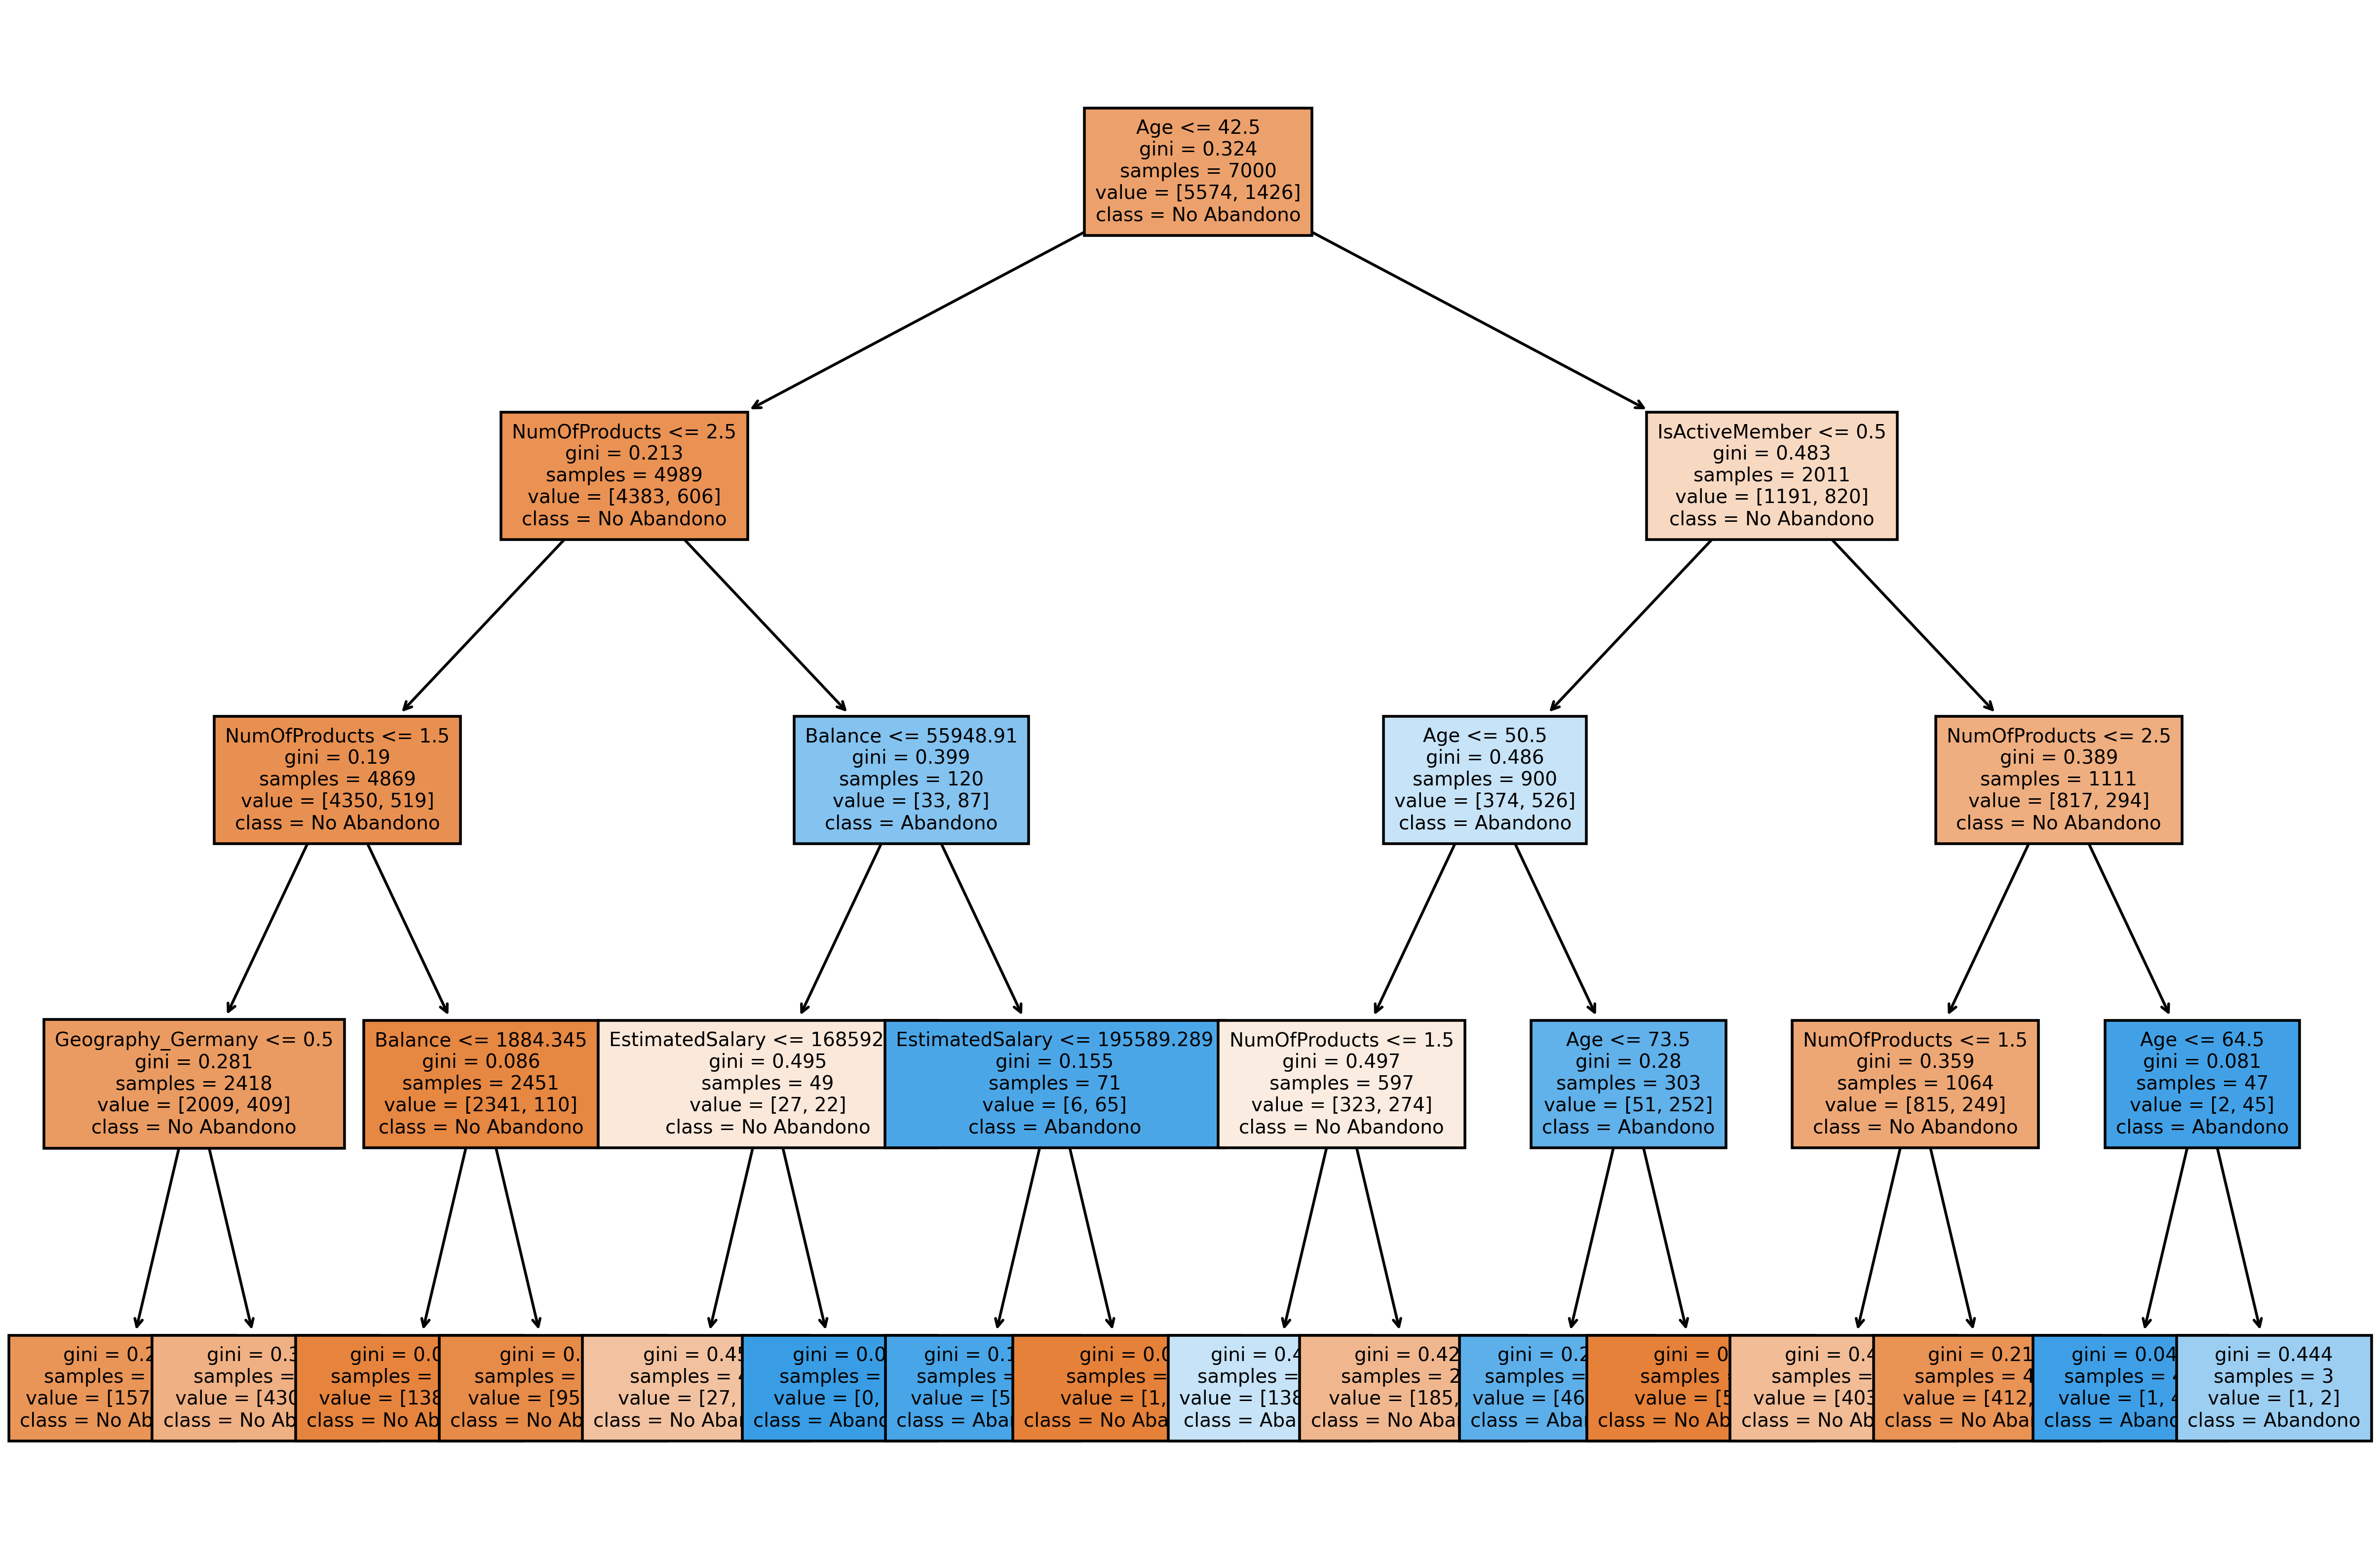

In [33]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (15,10), dpi = 400)

plot_tree(dtree_prun, 
          feature_names = list(X_train_df.columns),
          class_names = ['No Abandono', 'Abandono'], 
          filled = True, 
          fontsize = 7)

plt.show()

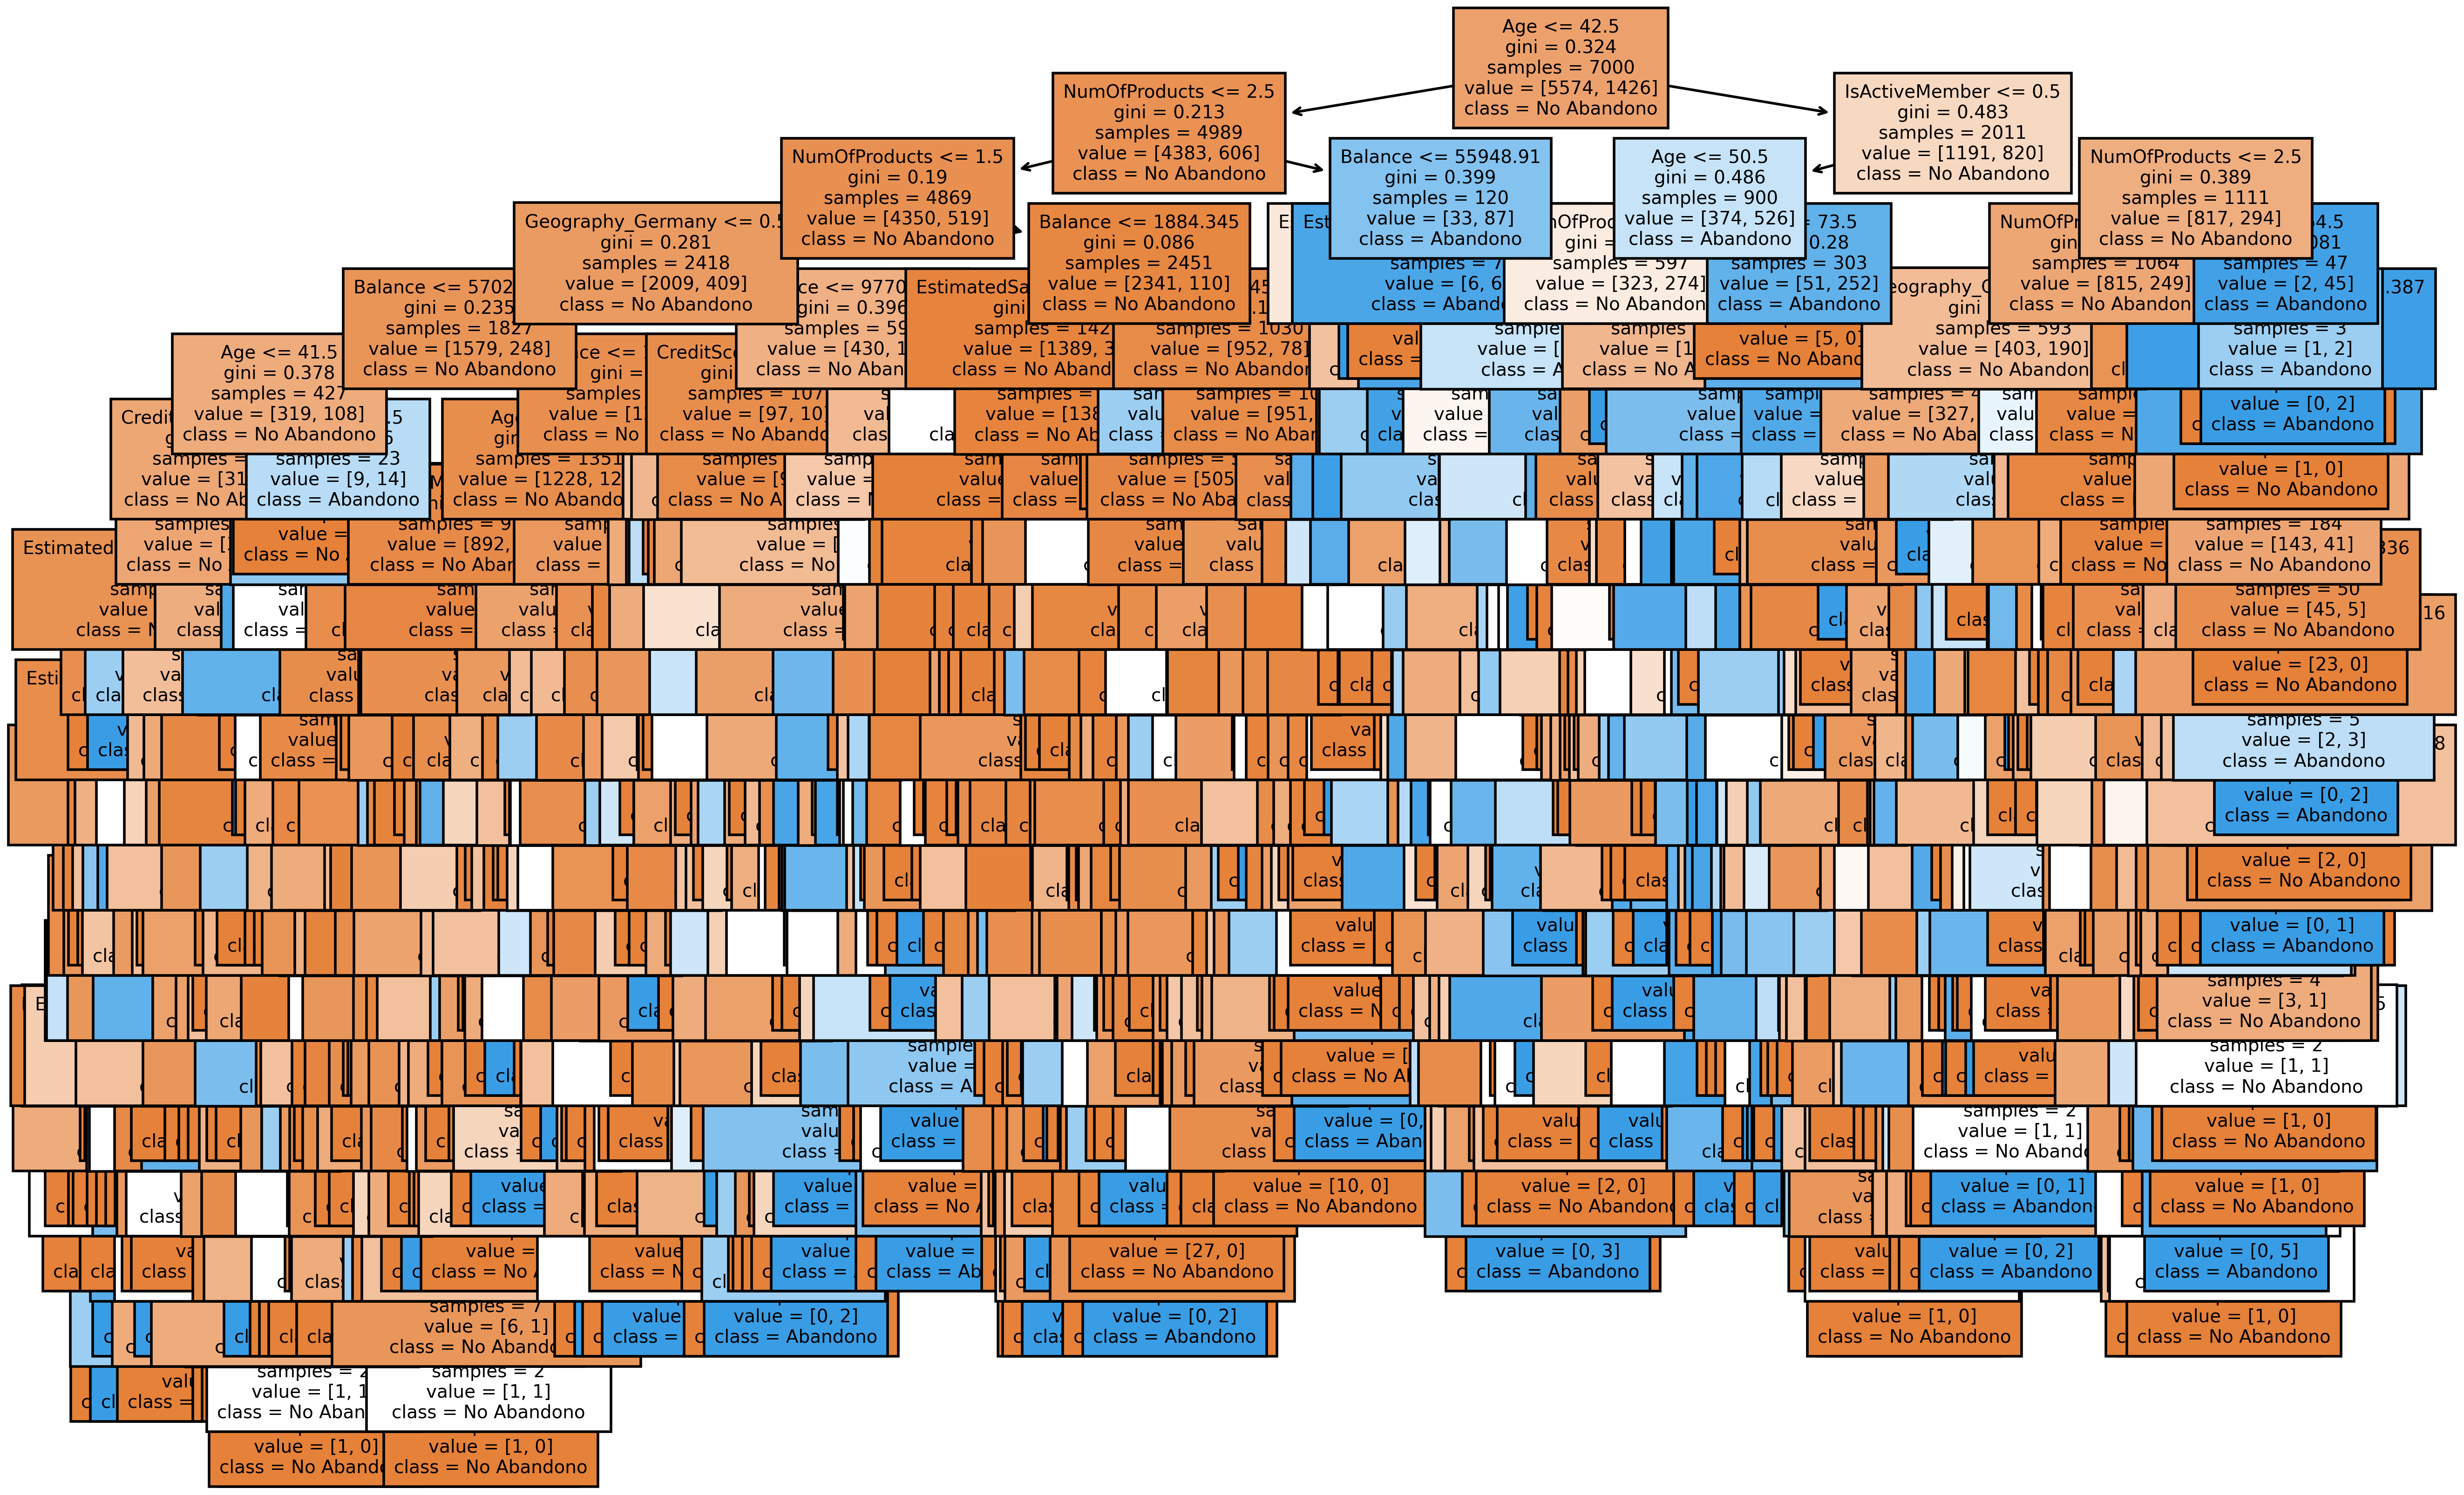

In [34]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (15,10), dpi = 400)

plot_tree(dtree_full, 
          feature_names = list(X_train_df.columns),
          class_names = ['No Abandono', 'Abandono'], 
          filled = True, 
          fontsize = 7)

plt.show()

In [35]:
#¿Cómo saber cuáles son las variables más importantes?
importancia = pd.DataFrame()
importancia['Variables'] = X_train_df.columns
importancia['Importancia'] = dtree_prun.feature_importances_
importancia

,Variables,Importancia
0,Geography_France,0.000000
1,Geography_Germany,0.025353
2,Geography_Spain,0.000000
3,Gender_Female,0.000000
4,Gender_Male,0.000000
5,CreditScore,0.000000
6,Age,0.453404
7,Tenure,0.000000
8,Balance,0.024315
9,NumOfProducts,0.330955


<Axes: ylabel='Variables'>

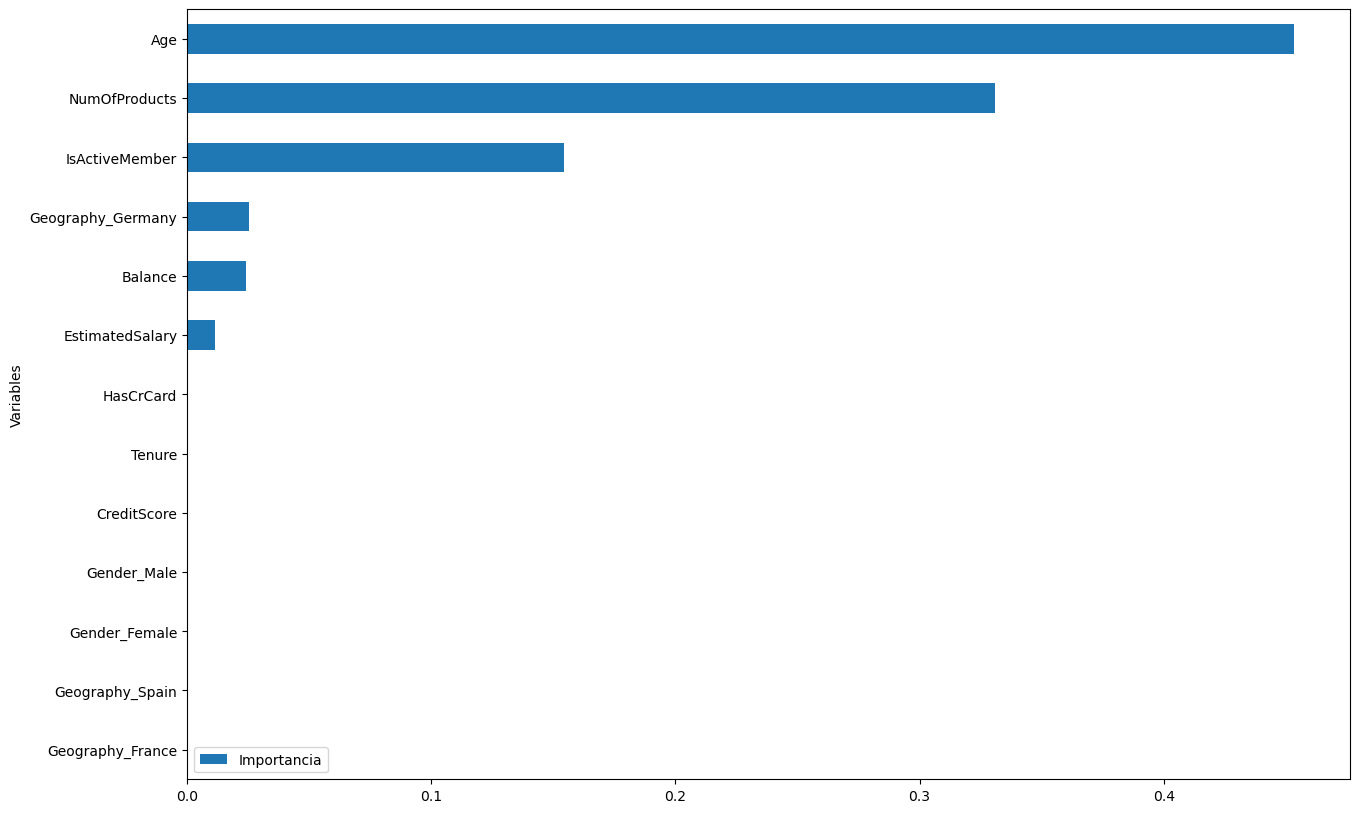

In [39]:
importancia.sort_values(by = 'Importancia', ascending = True).plot(x = 'Variables', y = 'Importancia', kind = 'barh',
                                                                  figsize = (15,10))

<Axes: ylabel='Variables'>

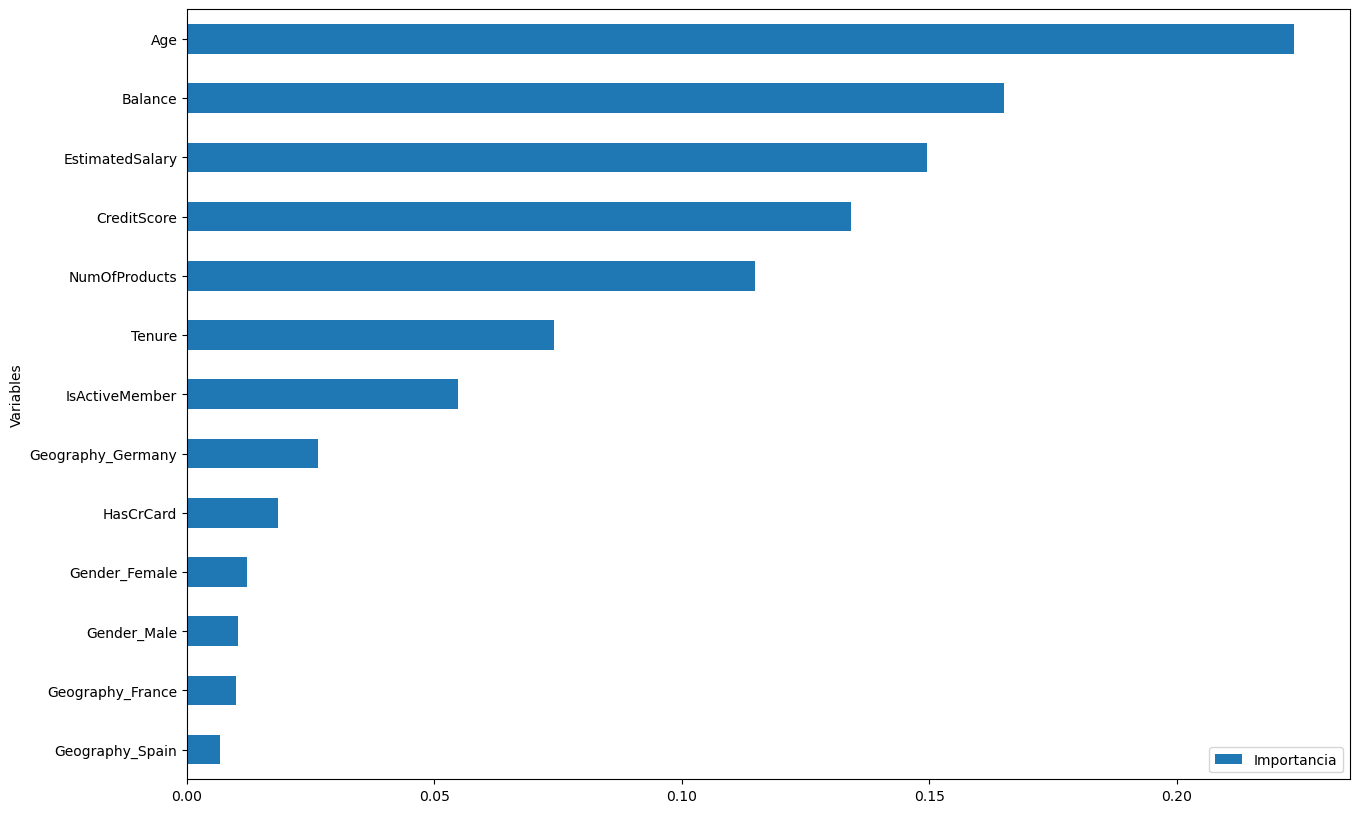

In [40]:
#¿Cómo saber cuáles son las variables más importantes?
importancia = pd.DataFrame()
importancia['Variables'] = X_train_df.columns
importancia['Importancia'] = dtree_full.feature_importances_
#¿Cómo saber cuáles son las variables más importantes?
importancia.sort_values(by = 'Importancia', ascending = True).plot(x = 'Variables', y = 'Importancia', kind = 'barh',
                                                                  figsize = (15,10))

In [41]:
pip install shap

     -------------------------------------- 448.0/448.0 kB 2.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [42]:
shap.version__

NameError: name 'shap' is not defined

In [43]:
import shap

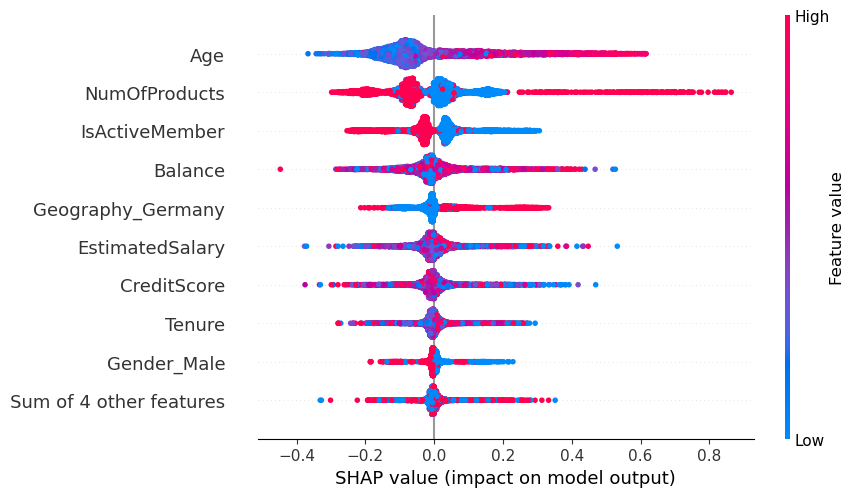

In [45]:
explainer = shap.Explainer(dtree_full)
shap_values = explainer(X_train_df)
shap.plots.beeswarm(shap_values[:,:,1])

In [46]:
from sklearn.model_selection import GridSearchCV

In [48]:
matriz_parametros = {'criterion': ['gini','entropy'],
                     'max_depth':[None, 2,4,6,8,10],
                     'min_samples_split':[10,100,1000,5000]}

In [49]:
from sklearn import metrics

In [50]:
metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'matthews_corrcoef', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'positive_likelihood_ratio', 'neg_negative_likelihood_ratio', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weig

In [51]:
metrica = 'recall_weighted'

In [52]:
grid = GridSearchCV(estimator = DecisionTreeClassifier(), 
                    param_grid = matriz_parametros,
                    scoring = metrica, 
                    refit = [metrica], 
                    verbose = 3)

In [53]:
grid.fit(X_train_df, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END criterion=gini, max_depth=None, min_samples_split=10;, score=0.794 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=None, min_samples_split=10;, score=0.785 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=None, min_samples_split=10;, score=0.806 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=None, min_samples_split=10;, score=0.812 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=None, min_samples_split=10;, score=0.814 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=None, min_samples_split=100;, score=0.828 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=None, min_samples_split=100;, score=0.846 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=None, min_samples_split=100;, score=0.855 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=None, min_samples_split=100;, score=0.844 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=None

[CV 1/5] END criterion=gini, max_depth=8, min_samples_split=100;, score=0.838 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, min_samples_split=100;, score=0.846 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, min_samples_split=100;, score=0.859 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, min_samples_split=100;, score=0.850 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, min_samples_split=100;, score=0.853 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, min_samples_split=1000;, score=0.828 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, min_samples_split=1000;, score=0.826 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, min_samples_split=1000;, score=0.831 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, min_samples_split=1000;, score=0.829 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, min_samples_split=1000;, score=0.829 total time=   0.0s
[CV 1/5] END criterion=gi

[CV 1/5] END criterion=entropy, max_depth=6, min_samples_split=10;, score=0.849 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, min_samples_split=10;, score=0.854 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, min_samples_split=10;, score=0.855 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, min_samples_split=10;, score=0.846 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, min_samples_split=10;, score=0.854 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, min_samples_split=100;, score=0.848 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, min_samples_split=100;, score=0.858 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, min_samples_split=100;, score=0.859 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, min_samples_split=100;, score=0.849 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, min_samples_split=100;, score=0.852 total time=   0.0s
[CV 1

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 4, 6, 8, 10],
                         'min_samples_split': [10, 100, 1000, 5000]},
             refit=['recall_weighted'], scoring='recall_weighted', verbose=3)

In [54]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 8, 'min_samples_split': 100}

In [55]:
grid.best_score_

0.8535714285714286

In [56]:
grid_pred = grid.predict(X_test_df)

In [57]:
print(classification_report(y_test, grid_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      2389
           1       0.72      0.53      0.61       611

    accuracy                           0.86      3000
   macro avg       0.80      0.74      0.76      3000
weighted avg       0.85      0.86      0.85      3000



In [58]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [59]:
from imblearn.over_sampling import SMOTE

In [61]:
sm = SMOTE()

sm_X_train_df, sm_y_train_df = sm.fit_resample(X_train_df, y_train)

In [62]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 8, 'min_samples_split': 100}

In [63]:
dtree_smote_grid = DecisionTreeClassifier(criterion = 'entropy', max_depth = 8, min_samples_split = 100)

In [64]:
dtree_smote_grid.fit(sm_X_train_df, sm_y_train_df)

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_split=100)

In [65]:
pred_sm = dtree_smote_grid.predict(X_test_df)

In [66]:
print(classification_report(y_test, pred_sm))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      2389
           1       0.66      0.60      0.63       611

    accuracy                           0.85      3000
   macro avg       0.78      0.76      0.77      3000
weighted avg       0.85      0.85      0.85      3000

